# Task: Raggruppamento degli utenti in base alle loro preferenze o comportamento sulla piattaforma;

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import combinations

In [12]:
df_user = pd.read_csv('./dataset/user_dropped.csv')

/var/folders/03/smk9v43n5dz1mcwcgdj4fzz40000gn/T/ipykernel_29822/3686083007.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_user = pd.read_csv('./dataset/user_dropped.csv')


In [13]:
# user_id // string, 22 character unique user id, maps to the user in user.json
# name // string, the user's first name
# review_count // integer, the number of reviews they've written
# yelping_since // string, when the user joined Yelp, formatted like YYYY-MM-DD
# friends // array of strings, an array of the user's friend as user_ids
# useful // integer, number of useful votes sent by the user
# funny // integer, number of useful votes sent by the user
# cool // integer, number of funny votes sent by the user
# fans // integer, number of cool votes sent by the user
# elite // array of integers, the years the user was elite
# average_stars 31 // integer, number of fans the user has
# compliment_hot // float, average rating of all reviews
# compliment_more // integer, number of hot compliments received by the user
# compliment_profile // integer, number of more compliments received by the user
# compliment_cute // integer, number of profile compliments received by the user
# compliment_list // integer, number of cute compliments received by the user
# compliment_note // integer, number of list compliments received by the user
# compliment_plain // integer, number of note compliments received by the user
# compliment_cool // integer, number of plain compliments received by the user
# compliment_funny // integer, number of cool compliments received by the user
# compliment_writer // integer, number of funny compliments received by the user
# compliment_photos // integer, number of writer compliments received by the user

In [14]:
# Drop some rows in order to increment performances

df_user = df_user.iloc[80000:, :]
# df_user = df_user.iloc[99000:, :]
df_user = df_user.reset_index()

In [15]:
df_user.head(10)

,level_0,Unnamed: 0,index,user_id,name,review_count,yelping_since,useful,funny,cool,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,80000,80000,1967897,eRFamSPW1d6_uaJpw_drtg,Ana,6,2017-04-06 18:37:44,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,80001,80001,1967898,jnSFe3rPnaYpNUJcmhwoxQ,Valerie,1,2016-06-25 20:48:59,4,2,0,...,0,0,0,0,0,0,0,0,0,0
2,80002,80002,1967899,Kz3d5l_32qV1wXIltOPvfg,Anne,1,2017-09-25 00:24:08,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,80003,80003,1967900,-FcQ1XVCQkGeMGOR5uW-rw,Kevin,1,2021-12-04 17:36:41,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,80004,80004,1967901,n7w5uwKLbHTGSDOtWNWuhQ,Anne,1,2015-01-07 20:01:26,9,1,0,...,0,0,0,0,0,0,0,0,0,0
5,80005,80005,1967902,qBF1PH83sE5Irxf5HufdkQ,Bruce,1,2018-07-07 23:12:46,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,80006,80006,1967903,gJ7--iglEBRgFroJ6uWrKg,Ran,15,2012-08-18 20:04:49,2,4,0,...,0,0,0,0,0,0,0,0,0,0
7,80007,80007,1967904,25tzfe9sG4jy81rxyLrwLw,Gina,9,2015-02-24 18:12:03,3,1,1,...,0,0,0,0,0,0,0,0,0,0
8,80008,80008,1967905,S_J_Ti-Gks2Fi_KQDiT2fQ,Mike,1,2019-09-09 02:26:16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,80009,80009,1967906,RzcyvSrxMd8qWkgU0Kr3-A,S,11,2012-06-10 05:51:58,16,2,3,...,0,0,0,0,0,0,0,0,0,0


## Group user by her/his behavior

### Text preprocessing


In [16]:
df_user_relevant_info = df_user[['review_count', 'useful', 'funny', 'cool', 'average_stars']].copy()
# df_user_relevant_info = df_user[['review_count', 'useful', 'funny', 'cool']].copy()

df_user_relevant_info.head(5)

,review_count,useful,funny,cool,average_stars
0,6,1,1,1,4.17
1,1,4,2,0,3.00
2,1,0,1,0,2.00
3,1,0,0,0,1.00
4,1,9,1,0,1.00


### Average reviews count

Average Positive reviews count: 9169
Average Negative reviews count: 8183


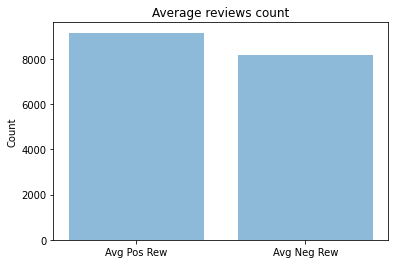

In [17]:
average_positive_reviews_count = (df_user_relevant_info['average_stars'] >= 4).sum()
average_negative_review_count = (df_user_relevant_info['average_stars'] <= 3).sum()

print("Average Positive reviews count:", average_positive_reviews_count)

print("Average Negative reviews count:", average_negative_review_count)

objects = ('Avg Pos Rew', 'Avg Neg Rew')
performance = [average_positive_reviews_count, average_negative_review_count]
y_pos = np.arange(len(objects))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Average reviews count')

plt.show()

## Algorithms


In [18]:
from sklearn.cluster import KMeans

# K-Means

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
n_clusters,,,
2,0.861961,9176.354559,0.74032


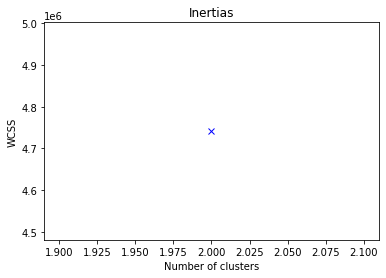

In [19]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

fitted_kmeans = {}
labels_kmeans = {}
df_scores = []
inertias = []

number_clusters = np.arange(2, 3)

for i in number_clusters:
    kmeans = KMeans(n_clusters=i)
    labels_clusters = kmeans.fit_predict(df_user_relevant_info)
    inertias.append(kmeans.inertia_)

    # Insert fitted model and calculated cluster labels in dictionaries, for further reference.
    fitted_kmeans[i] = kmeans
    labels_kmeans[i] = labels_clusters

    # Calculate various scores, and save them for further reference.
    df_scores.append({
        "n_clusters": i,
        "silhouette_score": silhouette_score(df_user_relevant_info, labels_clusters),
        "calinski_harabasz_score": calinski_harabasz_score(df_user_relevant_info, labels_clusters),
        "davies_bouldin_score": davies_bouldin_score(df_user_relevant_info, labels_clusters),
    }
    )

# Create a DataFrame of clustering scores, using `n_clusters` as index, for easier plotting.
df_scores = pd.DataFrame(df_scores)
df_scores.set_index("n_clusters", inplace=True)

# Plot inertias
plt.plot(number_clusters, inertias, 'bx-')
plt.title('Inertias')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

df_scores

In [20]:
best_scores_list = [
    df_scores["silhouette_score"].idxmax(),
    df_scores["calinski_harabasz_score"].idxmax(),
    df_scores["davies_bouldin_score"].idxmin()
]

best_number_of_cluster = max(set(best_scores_list), key=best_scores_list.count)

print("Best number of cluster:", best_number_of_cluster)

Best number of cluster: 2


In [21]:
df_cluster = labels_kmeans.get(best_number_of_cluster)

df_cluster = pd.DataFrame({'cluster': df_cluster})

df_user_relevant_info = pd.concat([df_user_relevant_info, df_cluster], axis=1)

df_user_relevant_info.head(50)

,review_count,useful,funny,cool,average_stars,cluster
0,6,1,1,1,4.17,1
1,1,4,2,0,3.00,1
2,1,0,1,0,2.00,1
3,1,0,0,0,1.00,1
4,1,9,1,0,1.00,1
5,1,0,0,0,2.00,1
6,15,2,4,0,3.38,1
7,9,3,1,1,1.44,1
8,1,0,0,0,5.00,1
9,11,16,2,3,4.33,1


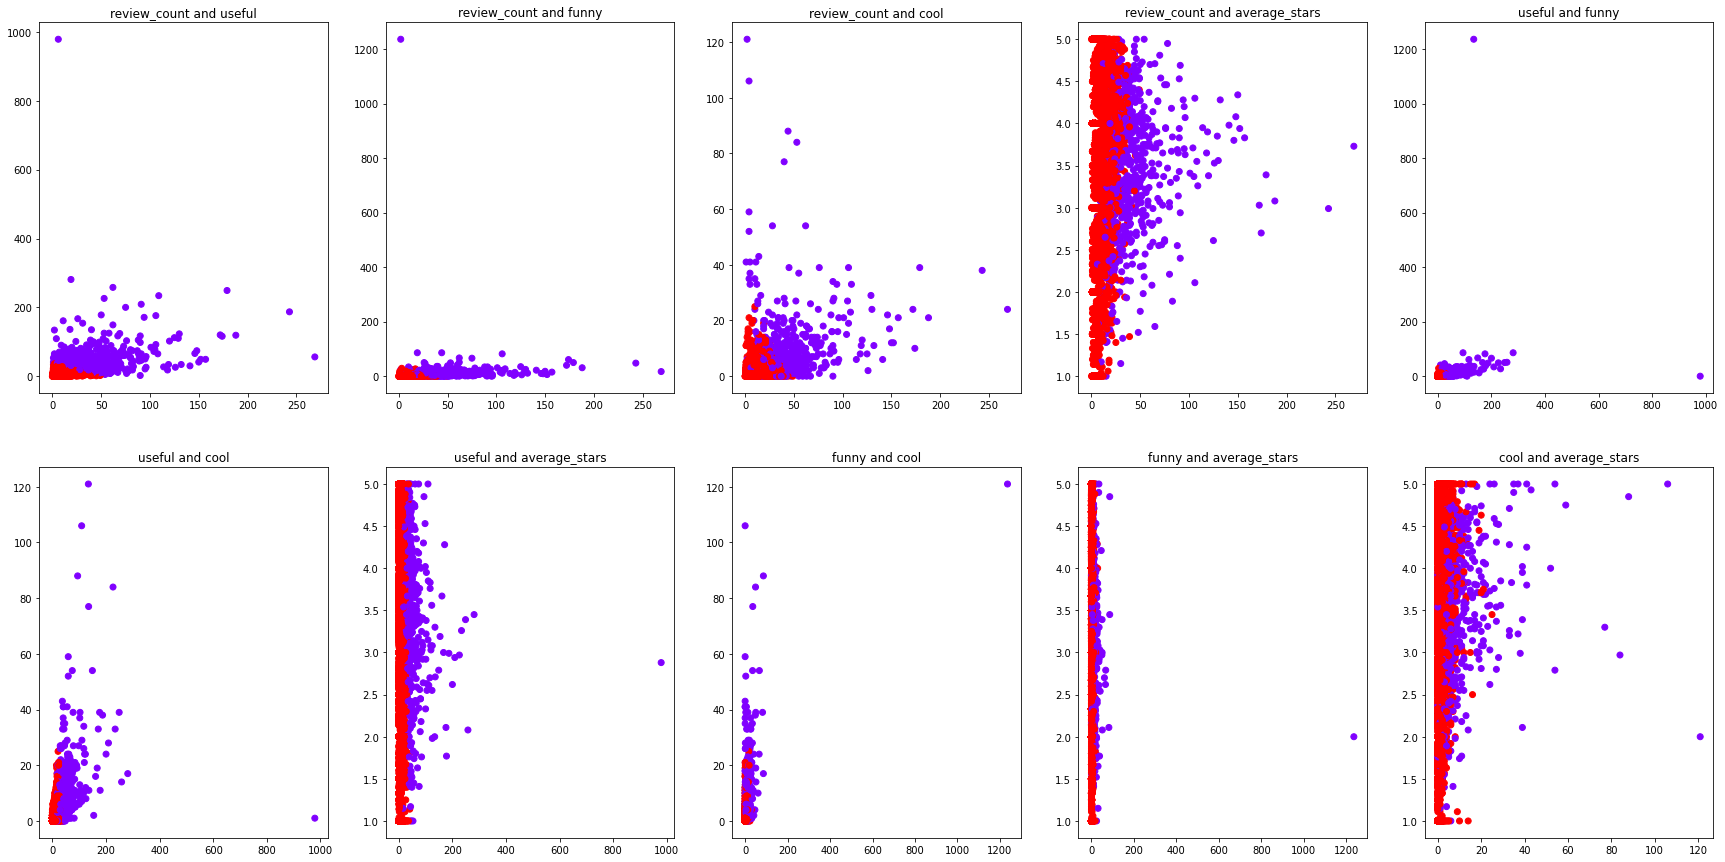

In [51]:
every_combinations = list(combinations(df_user_relevant_info.drop(columns='cluster').columns, 2))

num_row = 2
num_col = 5

figure, axis = plt.subplots(num_row, num_col, figsize=(30, 15))

next_row = 0
next_column = 0

for combination in every_combinations:
    first_feature = combination[0]
    second_feature = combination[1]

    axis[next_row, next_column].scatter(
        df_user_relevant_info[first_feature],
        df_user_relevant_info[second_feature],
        c=df_user_relevant_info['cluster'],
        cmap='rainbow'
    )

    axis[next_row, next_column].set_title(first_feature + " and " + second_feature)

    if next_column == (num_col - 1):
        next_row = next_row + 1
        next_column = 0
    else:
        next_column = next_column + 1